La solución es

       x           y[ 0 ]        y[ 1 ]        y[ 2 ]        y[ 3 ]       
   0.0000e+00    0.0000e+00    4.3301e+01    0.0000e+00    2.5000e+01 
   2.0000e-02    8.5874e-01    4.2576e+01    4.9384e-01    2.4387e+01 
   4.0000e-02    1.7032e+00    4.1870e+01    9.7557e-01    2.3788e+01 
   6.0000e-02    2.5336e+00    4.1181e+01    1.4454e+00    2.3202e+01 
   8.0000e-02    3.3505e+00    4.0510e+01    1.9037e+00    2.2630e+01 
   1.0000e-01    4.1542e+00    3.9856e+01    2.3507e+00    2.2070e+01 
   1.2000e-01    4.9449e+00    3.9219e+01    2.7866e+00    2.1522e+01 
   1.4000e-01    5.7230e+00    3.8597e+01    3.2117e+00    2.0986e+01 
   1.6000e-01    6.4889e+00    3.7991e+01    3.6261e+00    2.0462e+01 
   1.8000e-01    7.2428e+00    3.7399e+01    4.0302e+00    1.9949e+01 
   2.0000e-01    7.9849e+00    3.6822e+01    4.4242e+00    1.9446e+01 
   2.2000e-01    8.7157e+00    3.6258e+01    4.8081e+00    1.8954e+01 
   2.4000e-01    9.4354e+00    3.5708e+01    5.1824e+00  

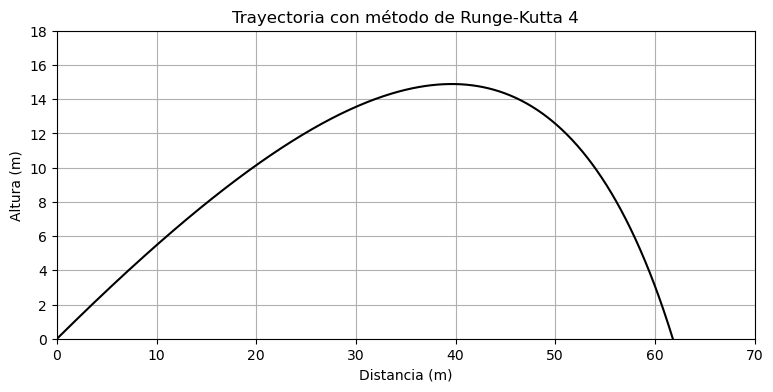

Tiempo de vuelo: 3.47 segundos
Alcance R: 61.81 metros


In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
# Autores:
# Luis Mario Ruelas Heras
# Jose Angel Ibarra Corvera

# Parametros
theta = np.radians(30) # Angulo de lanzamiento en radianes
m = 0.25 #kg
v0 = 50 #m/s
C_D = 0.03 #kg/(m/s)^(1/2)
g = 9.80665 #m/s^2

# Valores iniciales
x0 = 0 # Posición inicial en  (m)
x1 = v0*cos(theta) # Velocidad inicial en x (m/s)
y0 = 0 # Posición inicial en y (m)
y1 = v0*sin(theta) # Velocidad inicial en y (m/s)

# Metodo de Runge-Kutta
def Run_Kut4(F,x,y,xStop,h):
      def run_kut4(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x + h/2.0, y + K0/2.0)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h, y + K2)
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
      X = []
      Y = []
      X.append(x)
      Y.append(y)
      while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
        if y[2] < 0:  # Si el proyectil toca el suelo
            break 
      return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
      def imprimeEncabezado(n):
        print("\n       x ",end="         ")
        for i in range (n):
          print(" y[",i,"] ",end="      ")
        print()
    
      def imprimeLinea(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
          print("{:13.4e}".format(y[i]),end=" ")
        print() 
  
      m = len(Y)
      try: n = len(Y[0])
      except TypeError: n = 1
      if frec == 0: frec = m
      imprimeEncabezado(n)
      for i in range(0,m,frec):
       imprimeLinea(X[i],Y[i],n)
      if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)
      


def F(x,y):
      v = sqrt(y[1]**2 + y[3]**2)
      F = np.zeros(4)
      F[0] = y[1]
      F[1] = (-C_D / m) * y[1] * v**(1/2)
      F[2] = y[3]
      F[3] = (-C_D / m) * y[3] * v**(1/2) - g  
      return F

y = np.array([x0, x1, y0, y1])
X, Y= Run_Kut4(F, 0.0, y, 6.0, 0.005)
print("La solución es")
imprimeSol(X, Y, 4)

# Grafica de la trayectoria
plt.figure(figsize = (9, 4))
plt.plot(Y[:, 0], Y[:, 2], color = 'black')
plt.xlim(0, 70)
plt.ylim(0, 18)

plt.xlabel('Distancia (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria con método de Runge-Kutta 4')

plt.grid()
plt.show()

print(f'Tiempo de vuelo: {X[-1]:.2f} segundos')
print(f'Alcance R: {Y[-1, 0]:.2f} metros')